<a href="https://colab.research.google.com/github/marayyy/Guvi-Tasks/blob/main/Car_Worth_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.shape

(804, 12)

# Task 1

# 1.Linear regression

In [7]:
x=np.array(df["Mileage"]).reshape(-1,1)
y=np.array(df["Price"]).reshape(-1,1)

In [8]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [9]:
model.coef_

array([[-0.1725205]])

In [10]:
model.intercept_

array([24764.55900606])

In [11]:
y_pred=model.predict(x)

linear equation is 24764.55+(-0.1725*x)

# 2.Chart the orginal data and result data

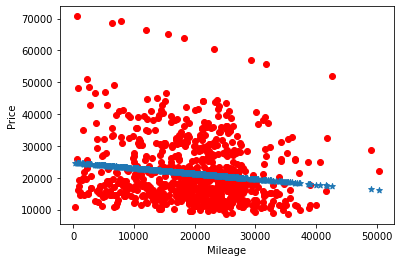

In [12]:
plt.scatter(x,y,c="red")
plt.scatter(x,y_pred,marker="*")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

find its is good fit are not

In [13]:
model.score(x,y)

0.02046344732348926

the score of mileage and price in the linear equation is so bad

# Task 2:

# 1. Find the linear equation with extra feature

In [14]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [15]:
x=df[["Mileage",'Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y=df[["Price"]]

In [16]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [17]:
model.coef_

array([[-1.69747832e-01,  3.79237893e+03, -7.87220732e+02,
        -1.54274585e+03,  6.28899715e+03, -1.99379528e+03,
         3.34936162e+03]])

In [18]:
model.intercept_

array([6758.7551436])

the coefficent and intercept are -1.69747832e-01, 3.79237893e+03, -7.87220732e+02,-1.54274585e+03, 6.28899715e+03, -1.99379528e+03, 3.34936162e+03 and 6758.75

# 2.whether its a good fit or not

In [19]:
model.score(x,y)

0.4462643536728379

the score is 44% and it is not a good correlation and it is not good fit

# 3.Find the best combination and best score

In [20]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [21]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [22]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [23]:
df["Type"].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [24]:
df1=pd.get_dummies(df,drop_first=True)

In [25]:
df1.shape

(804, 94)

In [26]:
df.shape

(804, 12)

In [27]:
#defining the function for model calling
def car(x,y):
    model=LinearRegression()
    model.fit(x,y)
    sco=model.score(x,y)
    return sco

In [28]:
#1.selecting all the feature
x=df1.drop("Price",axis=1)
y=df1[["Price"]]
car(x,y)

0.9924082614213805

Selecting all the feature it gives 99.2% of score which is a good fit score

# task 3:

# Research dummy variables in scikit-learn to see how to use the make, model, and body type.1Find the best combination of factors to predict price.

In [29]:
#creating dummy variable
df2=pd.get_dummies(df,drop_first=True)

In [30]:
df2.shape

(804, 94)

In [31]:
df.shape

(804, 12)

Dummy variable may cause dimensionality curse beacuse of many feature

# Find the best combination of factors to predict price.

In [32]:
#1.selecting all the feature
x=df1.drop("Price",axis=1)
y=df1[["Price"]]
car(x,y)

0.9924082614213805

# Conclusion

Selecting all the feature it gives 99.2% of score which is a good fit score and each feature have a correlation with the price